In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Input
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


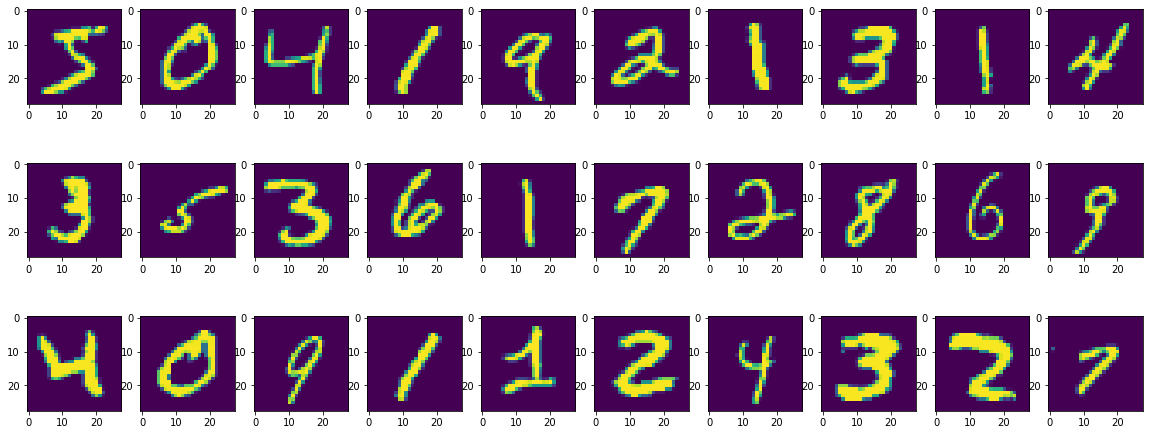

In [ ]:
plt.figure(figsize=(20, 8))
for i in range(30):
  plt.subplot(3,10,i+1)
  plt.imshow(x_train[i])
plt.show() 

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0


In [ ]:
def build_functional_model():

  input = Input(shape= (28,28))
  x = tf.keras.layers.Flatten()(input)
  x = tf.keras.layers.Dense(128, activation = tf.nn.relu)(x)
  x = tf.keras.layers.Dense(64, activation = tf.nn.relu)(x)
  outputs = tf.keras.layers.Dense(10, activation = tf.nn.softmax)(x)
  #Build the model
  fun_model = Model(inputs = input, outputs = outputs)
  return fun_model



In [ ]:
model = build_functional_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


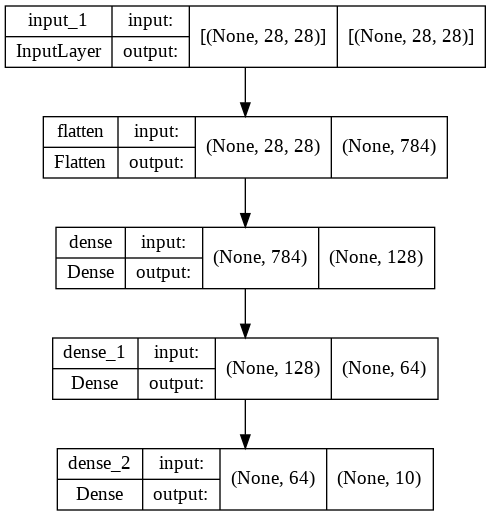

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
model.compile(optimizer= tf.optimizers.Adam(), loss = "sparse_categorical_crossentropy", metrics=['accuracy'])

In [ ]:
epochs = 20
model.fit(x_train, y_train, epochs = epochs)

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2421 - accuracy: 0.9294
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1014 - accuracy: 0.9693
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0700 - accuracy: 0.9777
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0529 - accuracy: 0.9830
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0423 - accuracy: 0.9863
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9885
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0284 - accuracy: 0.9905
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0245 - accuracy: 0.9920
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0222 - accuracy: 0.9926
Epoch 10/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.017

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 97.64000177383423


In [ ]:
print(y_test[0])

7


The number is 1


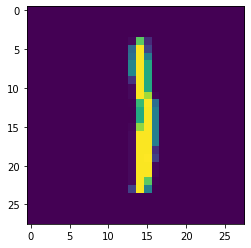

In [ ]:
plt.imshow(x_test[154])
import numpy as np
x = model.predict(x_test)
print("The number is", np.argmax(x[154]))


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Handwritten-digits-from-the-MNIST-data-set-5-If-f-denotes-the-image-of-the-handwritten.png to Handwritten-digits-from-the-MNIST-data-set-5-If-f-denotes-the-image-of-the-handwritten.png
